In [ ]:
import numpy as np
import pandas as pd

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


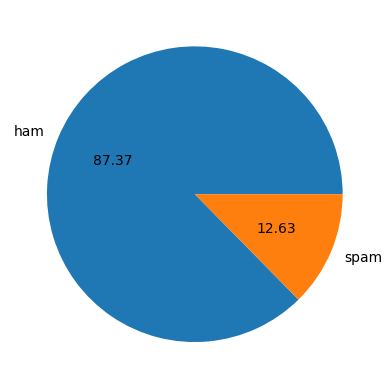

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-25-93fa58f41cbb>:63: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


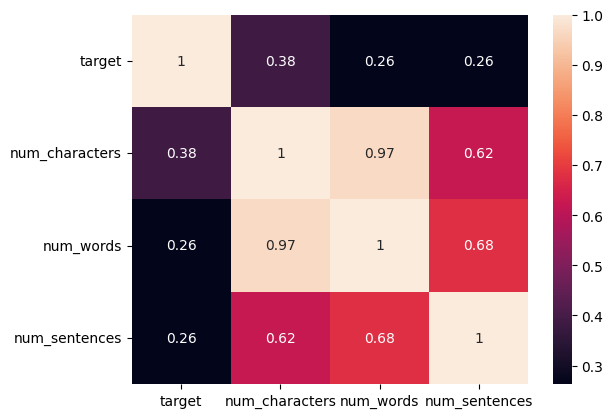

In [ ]:
#using encoding latin-1 so that it can read special characters present in my file
df = pd.read_csv('/content/spam.csv', encoding='latin-1')
#to visualize data present in csv files
df.info()
# to remove columns which contains 99% of data having null values
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.sample(5)
#renaming columns to make it more descriptive
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
#seeing any 5 random rows to check wether all the functions are applied according to our needs
df.sample(5)
#ham-.0 and spam-> 1
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target']=encoder.fit_transform(df['target'])
df.sample(5)
#check for missing values
df.isnull().sum()
#check for duplicate values
df.duplicated().sum()
#remove duplicates
df = df.drop_duplicates(keep='first')
df.duplicated().sum()
#to count the number of ham and spam in our data
df['target'].value_counts()
#plot data as well as to get percentage of ham and spam upto 2 places of decimal
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()
#data is imbalanced . conclusion drwan
import nltk
nltk.download('punkt')
# it calculates the length of each string in the 'text' column of the DataFrame and returns a new Series containing the lengths of the strings
df['num_characters']=df['text'].apply(len)
#takes a string x and tokenizes it into a list of words.
#df['text'].apply(lambda x:nltk.word_tokenize(x))
#number of words = length of list of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
#we will tokenize on the basis of sentences i.e. create a list of sentences then will find the length of list
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
#df[['num_characters','num_words','num_sentences']].describe()-> By running df[['num_characters','num_words','num_sentences']].describe(), you will get a table-like output that provides statistical information for each of the specified columns.
#This can be useful for understanding the distribution and characteristics of the data in those columns
#df['target'] == 0: It creates a boolean mask that selects rows where the 'target' column has a value of 0.
#df[df['target'] == 0]: This applies the boolean mask to the DataFrame, resulting in a new DataFrame that only contains rows where the 'target' column is 0.
#[['num_characters','num_words','num_sentences']]: This part selects the columns 'num_characters', 'num_words', and 'num_sentences' from the filtered DataFrame.
#.describe(): This function computes summary statistics for the selected columns, such as count, mean, standard deviation, minimum, and maximum values.
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()
#by running the above two pieces of code we find that no_of_words , no_of_sentences on an average is more than in spam messages.
import seaborn as sns
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')
#sns.histplot(: This part starts the sns.histplot() function call from the Seaborn library, which is used for creating histograms
#df['target'] == 0: This is a conditional indexing operation that creates a boolean mask. It
#checks each row of the DataFrame df to see if the value in the 'target' column is equal to 0.
#This results in a boolean Series where True corresponds to rows with 'target' equal to 0
#df[df['target'] == 0]: This is using the boolean mask to filter the DataFrame. It selects
#only the rows where the 'target' column is equal to 0. So, this new DataFrame contains only the rows where the 'target' is 0.
#['num_characters']: After filtering the DataFrame based on the 'target', this part of the
#code selects the 'num_characters' column from the filtered DataFrame. This gives you a Series
#that contains the 'num_characters' values for the rows where 'target' is 0.
#): This closes the argument for the sns.histplot() function.
sns.heatmap(df.corr(),annot=True)
#sns.heatmap(: This is the start of the sns.heatmap() function call from the Seaborn
#library, which is used for creating heatmap visualizations.
#df.corr(): This part calculates the correlation matrix of the numerical features in your
#DataFrame df. The correlation matrix shows how each numerical feature is correlated with
#every other numerical feature. Correlation values can range from -1 to 1, where -1 indicates a
#strong negative correlation, 1 indicates a strong positive correlation, and 0 indicates no correlation.
#annot=True: The annot parameter is set to True to display the actual correlation values on the heatmap cells
#by doing htis we find correlation of a spam message with num_characters is 0.26 which is more than correlation with num_words and num_sentences
#in our heat map we find highest correlation is of num_words and num_chracters
#so we will take the column of num_characters
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

from nltk.corpus import stopwords
# Download the NLTK stopwords dataset (only need to do this once)
nltk.download('stopwords')

import string

def transform_text(text):
    text = text.lower()  # Convert text to lowercase
    text = nltk.word_tokenize(text)  # Tokenize the text into words
    y = []

    # Loop through the words and keep only alphanumeric words
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]  # Copy the filtered words to the 'text' variable
    y.clear()     # Clear the 'y' list for reuse

    # Loop through the words and keep only non-stopwords and non-punctuation words
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]  # Copy the filtered words to the 'text' variable
    y.clear()     # Clear the 'y' list for reuse

    # Loop through the words and apply stemming using PorterStemmer
    ps = PorterStemmer()
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)  # Join the stemmed words back into a sentence

df['transformed_text'] = df['text'].apply(transform_text)
#now we will create a word cloud for better visualization of data
#in word cloud the most frequend word font size is more than less frequent words

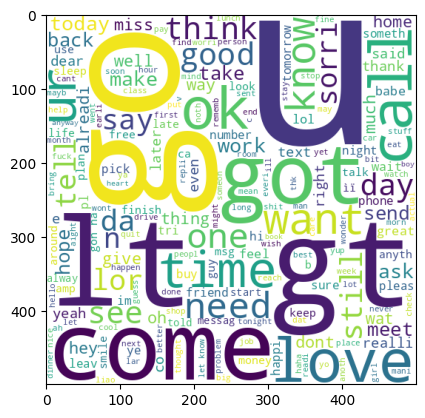

In [ ]:
#.str.cap(sep=" ")is a method applied to the transformed_text column of dataframe and joins all the string to a single string seperated by space
#.str is used to access string methods on pandas series columns
#.cat(sep=" ")is used to concatenate the string based on a specified operator
#sep=" "this argument sepecifies the operator that should be used to join strings
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color="white") #creating an object of class WordCloud
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)
#will do the same for ham messages
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)
#we can see top words used in ham and spam messages in cloud but still to see it we will write some custom code
#.tolist-> converts strings to single list which is a list of string where every string is a message
spam_corpus=[]#making a list of all words in spam messages
for msg in df[df['target'] == 1]['transformed_text'].tolist():
  for word in msg.split():
#msg.split() is used to split message into words on the basis of white space characters by default
#then it loops through individual word in the message
    spam_corpus.append(word)

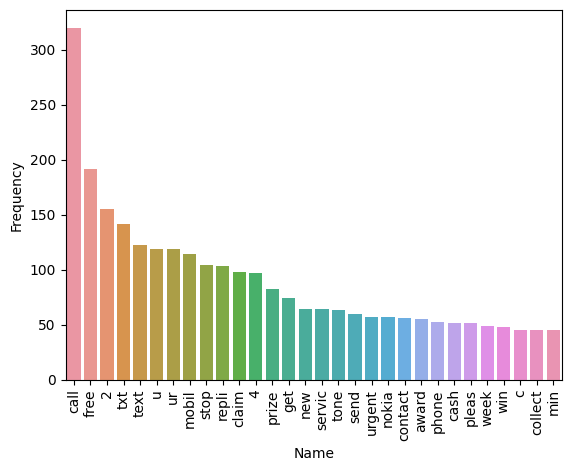

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315
0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153
0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283
0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481
0.9593810444874274
[[896   0]
 [ 42  96]]
1.0
0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [ ]:
#task-: we need to find the frequency of each word in our spam
from collections import Counter
#the Counter class is used to count the frequency of elements in a list and store the result in a dictionary like object
#Counter(spam_corpus)
#it retirves the most common 30 words alongwith their frequencies
#Counter(spam_corpus).most_common(30)
#pd.DataFrame is used to create a dataframe in this case name of first column is words
#and second column is frequency of each word . so dataframe is used to display each word along with frequency.
new_df = pd.DataFrame(Counter(spam_corpus).most_common(30),columns=['Name','Frequency'])
sns.barplot(x='Name', y='Frequency', data=new_df)
#this line rotates x-axis labels vertically for better readability escpecially
#useful in case of overlapping labels
plt.xticks(rotation='vertical')
plt.show()
#the first argument in barplot specifies the values on x axis
#the second argument of y axis specifies the corresponding values on y axis

#task:-model-building
#naive bayes works best for spam detection , sentiment analysis , topic categorization i.e with textual data
#also naive bayes needs numbers in input as well as output but our input transformed_text contains textual data
#text -> numbers ie text vectorisation
#text vectorisation can be done only in 3 ways first bag of words in this we make columns of most frequent words
#and in every sms we check that frequent word appears how many times in the entire message
#in this way we get vector containing numbers for each sms , we will be using bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer() #creating an object of CountVectorizer class
X = cv.fit_transform(df['transformed_text']).toarray() #since we get sparse array which is suitable in terms
#of memory allocation but we use.toarray to convert it into dense array on which we can easily perform all operations
#cv.fit_transform converts the column 'transformed_text' to sparse matrix representation
#X.shape()-> (5169,6677)-> 5169 sms and 6677 most frequent words
y=df['target'].values
# .values is used to convert the values in target column to numpy array which is often essential when working
# with libraries like scikit-learn as it expects input in the form of numpy array
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=2)
#when you specify a random_value you ensure data is shuffled every time in the same way you run your code means
#testing and training samples would always be same this helps to compare different model perfomances

#since we do not know the distribution of data so we will import all the types of naive bayes
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
#now we will make object for each class
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
#now let's check how GaussianNB perfoms for our data
#we need high precision means results should be correct 99% of the time
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score
gnb.fit(X_train,y_train)
#a method called on gnb object -> .fit()
#.fit()method is used to train the classifier based on training dataset
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
#precision score came very less for GaussianNB model so we will not take it
#for imbalanced data precision_score matters more than accuracy_score
#                  Predicted Negative (Legitimate)    Predicted Positive (Fraudulent)
#Actual Negative         9000 (True Negative)              50 (False Positive)
#Actual Positive           5 (False Negative)                10 (True Positive)
#Accuracy = (True Positives + True Negatives) / Total Predictions
#Accuracy = (10 + 9000) / (9000 + 50 + 5 + 10) = 9010 / 9065 ≈ 0.9956
#While the accuracy seems impressive at 99.56%, it can be misleading in this imbalanced
#scenario. The model is correctly identifying the majority class (legitimate transactions) but
#failing to catch a significant portion of the rare fraudulent transactions.
#Precision = True Positives / (True Positives + False Positives)
#Precision = 10 / (10 + 50) ≈ 0.1667
#The precision score highlights the issue: out of the transactions predicted as fraudulent, only
#about 16.67% are actually fraudulent. This means there's a relatively high number of false
#positives, which could result in unnecessary investigations or actions taken against legitimate customers.
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
#lets try bnb
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
#and we got precision score highest for bnb of 97%
#now let's try instead of bag of words we will try tfidfVectorizer
#Unlike the bag of words (BoW) representation, TF-IDF takes into account not only the frequency of words but
# also their importance in the context of the entire corpus of documents.
#Term Frequency (TF):
#Term Frequency measures how often a word appears in a document relative to the total number of words in that
# document. It quantifies the importance of a word within a specific document. The formula for calculating the
# TF of a word "w" in a document "d" is:

#TF(w, d) = (Number of times word w appears in document d) / (Total number of words in document d)
#Inverse Document Frequency (IDF):
#Inverse Document Frequency measures the rarity of a word across the entire corpus of documents. Words that
#appear frequently in many documents have lower IDF values, while words that appear rarely or in a few documents
# have higher IDF values. The formula for calculating the IDF of a word "w" in a corpus of documents is:
#Words that are common in a specific document but rare in the rest of the corpus will have higher TF-IDF values,
#IDF(w) = log_e(Total number of documents / Number of documents containing word w)
#TF-IDF Calculation:
#The TF-IDF value for a word "w" in a document "d" is the product of its TF and IDF:

#TF-IDF(w, d) = TF(w, d) * IDF(w)

# Vectorization:
# After calculating the TF-IDF values for all words in all documents, you represent each document as a numerical
# vector. Each element of the vector corresponds to the TF-IDF value of a specific word in the document. This
#  results in a high-dimensional vector where each dimension represents a unique word in the entire corpus.
from sklearn.feature_extraction.text import TfidfVectorizer
#will repeat the entire procedure for TfidfVectorizer same what we did for BAG of Words and will try to find out
#which naive bayes algorithm will give maximum precision

tfidf = TfidfVectorizer(max_features)
X = tfidf.fit_transform(df['transformed_text']).toarray()
y=df['target'].values
# .values is used to convert the values in target column to numpy array which is often essential when working
# with libraries like scikit-learn as it expects input in the form of numpy array
X_train, X_test, y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=2)
#when you specify a random_value you ensure data is shuffled every time in the same way you run your code means
#testing and training samples would always be same this helps to compare different model perfomances

#since we do not know the distribution of data so we will import all the types of naive bayes
#from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
#now we will make object for each class
# gnb = GaussianNB()
# mnb = MultinomialNB()
# bnb = BernoulliNB()
#now let's check how GaussianNB perfoms for our data
#we need high precision means results should be correct 99% of the time
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score
gnb.fit(X_train,y_train)
#a method called on gnb object -> .fit()
#.fit()method is used to train the classifier based on training dataset
y_pred11 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred11))
print(confusion_matrix(y_test,y_pred11))
print(precision_score(y_test,y_pred11))
#lets try mnb
mnb.fit(X_train,y_train)
y_pred22 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred22))
print(confusion_matrix(y_test,y_pred22))
print(precision_score(y_test,y_pred22))
#lets try bnb
bnb.fit(X_train,y_train)
y_pred33 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred33))
print(confusion_matrix(y_test,y_pred33))
print(precision_score(y_test,y_pred33))
#by doing this we can conclude that TfidfVectorizer gave the best precision score for MultinomialNB

differences between list and dictionary

# Creating a list of numbers
numbers_list = [10, 20, 30, 40, 50]

# Accessing elements of the list using indexing
print(numbers_list[0])  # Output: 10
print(numbers_list[2])  # Output: 30

# Modifying an element of the list
numbers_list[1] = 25
print(numbers_list)     # Output: [10, 25, 30, 40, 50]


# Creating a dictionary of names and ages
ages_dict = {
    'Alice': 28,
    'Bob': 35,
    'Charlie': 42,
    'David': 19
}

# Accessing values in the dictionary using keys
print(ages_dict['Alice'])    # Output: 28
print(ages_dict['Charlie'])  # Output: 42

# Modifying a value in the dictionary
ages_dict['Bob'] = 36
print(ages_dict)            # Output: {'Alice': 28, 'Bob': 36, 'Charlie': 42, 'David': 19}


looping over a dictionary
ages = [1,2,3,4]
for i in ages:
  print(i)

output
1
2
3
4

looping over a list
ages = {'Alice':1 , 'Bob':2 , 'Charles':3}
for a , b in ages:
 print(a,b)

output:
Alice 1
Bob 2
Charles 3


In [ ]:
#now we will train our model using all classifier and see which gives best results

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
# Imagine you have a bunch of different tools, like a hammer, a saw, a wrench, and so on. Each tool serves a
# different purpose. Now, you want to keep track of these tools and be able to easily use them when needed.
# Instead of having them scattered around, you decide to organize them neatly on a tool rack.

# In a similar way, the code you provided is like creating a tool rack for a bunch of machine learning tools
#  (classifiers). Each tool (classifier) has a name.

# 'SVC', 'KN', 'NB', 'DT', 'LR', 'RF', 'AdaBoost', 'BgC', 'ETC', 'GBDT', and 'xgb' are string labels that i
# have chosen to represent ml classifiers and svc, knc, mnb, dtc, lrc, rfc, abc, bc, etc, gbdt, and xgb are the
#  actual classifier objects that i have initialized in my code earlier.

# in the following example we can even change the names of classifiers and make it more descriptive
# Create a dictionary with more descriptive labels
# classifiers = {
#     'Support Vector Classifier': svc,
#     'K-Nearest Neighbors': knc,
#     'Naive Bayes': mnb,
#     'Decision Tree': dtc,
#     'Logistic Regression': lrc,
#     'Random Forest': rfc,
#     'AdaBoost': abc,
#     'Bagging Classifier': bc,
#     'Extra Trees': etc,
#     'Gradient Boosting': gbdt,
#     'XGBoost': xgb
# }

clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

#below is the code to train our model using different ml classifiers

def train_classifier (clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
#   y_true: The true labels (ground truth) of the data.
# y_pred: The predicted labels made by the classifier.
# The correct order of these parameters is y_true (true labels) followed by y_pred (predicted labels)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)

  return accuracy , precision

In [ ]:
#now we will loop through our clf dictionary and will train the model for each classifier and will be appending
#precision and accuracy for all the classifiers in a list named as accuracy_scores & precision_scores
#it will help us to predict best classifier for our model

accuracy_scores = []
precision_scores = []

for name, clf_instance in clfs.items():
    current_accuracy, current_precision = train_classifier(clf_instance, X_train, y_train, X_test, y_test)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

# Create a DataFrame to store the performance metrics
performance_df = pd.DataFrame({
    'Classifier': clfs.keys(),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
})

# Sort the DataFrame by Precision in descending order
performance_df = performance_df.sort_values(by='Precision', ascending=False)

# Print the performance DataFrame
print(performance_df)


   Classifier  Accuracy  Precision
0         SVC  0.972921   0.974138
8         ETC  0.972921   0.982456
5          RF  0.971954   1.000000
10        xgb  0.970019   0.934959
6    AdaBoost  0.961315   0.945455
2          NB  0.959381   1.000000
7         BgC  0.958414   0.862595
9        GBDT  0.952611   0.923810
4          LR  0.951644   0.940000
3          DT  0.935203   0.838095
1          KN  0.900387   1.000000
